In [11]:
import pandas as pd
import pydotplus
from IPython.display import Image
from sklearn import tree

In [12]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [13]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['Pregnancies']=enc.fit_transform(data['Pregnancies'].values)
data['Glucose']=enc.fit_transform(data['Glucose'].values)
data['BloodPressure']=enc.fit_transform(data['BloodPressure'].values)
data['SkinThickness']=enc.fit_transform(data['SkinThickness'].values)
data['Insulin']=enc.fit_transform(data['Insulin'].values)
data['BMI']=enc.fit_transform(data['BMI'].values)
data['DiabetesPedigreeFunction']=enc.fit_transform(data['DiabetesPedigreeFunction'].values)
data['Age']=enc.fit_transform(data['Age'].values)

In [14]:
str_data = data.drop(columns=['Outcome'])
str_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,23,19,22,0,62,196,10
1,8,121,17,0,0,30,367,11
2,1,27,19,16,62,77,53,0
3,0,75,4,28,102,209,513,12
4,5,54,23,0,0,53,80,9


In [15]:
cls_data = data['Outcome']
cls_data.head()

0    0
1    1
2    0
3    1
4    0
Name: Outcome, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(str_data, cls_data, test_size=0.3, random_state=0)
tree_data = DecisionTreeClassifier(random_state=0)
tree_data.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [18]:
print("Nilai akurasi: ", tree_data.score(X_test, y_test))

Nilai akurasi:  0.7445887445887446


In [19]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_data, out_file='image.dot',class_names=["TIDAK","YA"],
                feature_names=str_data.columns, impurity=False, filled=True)

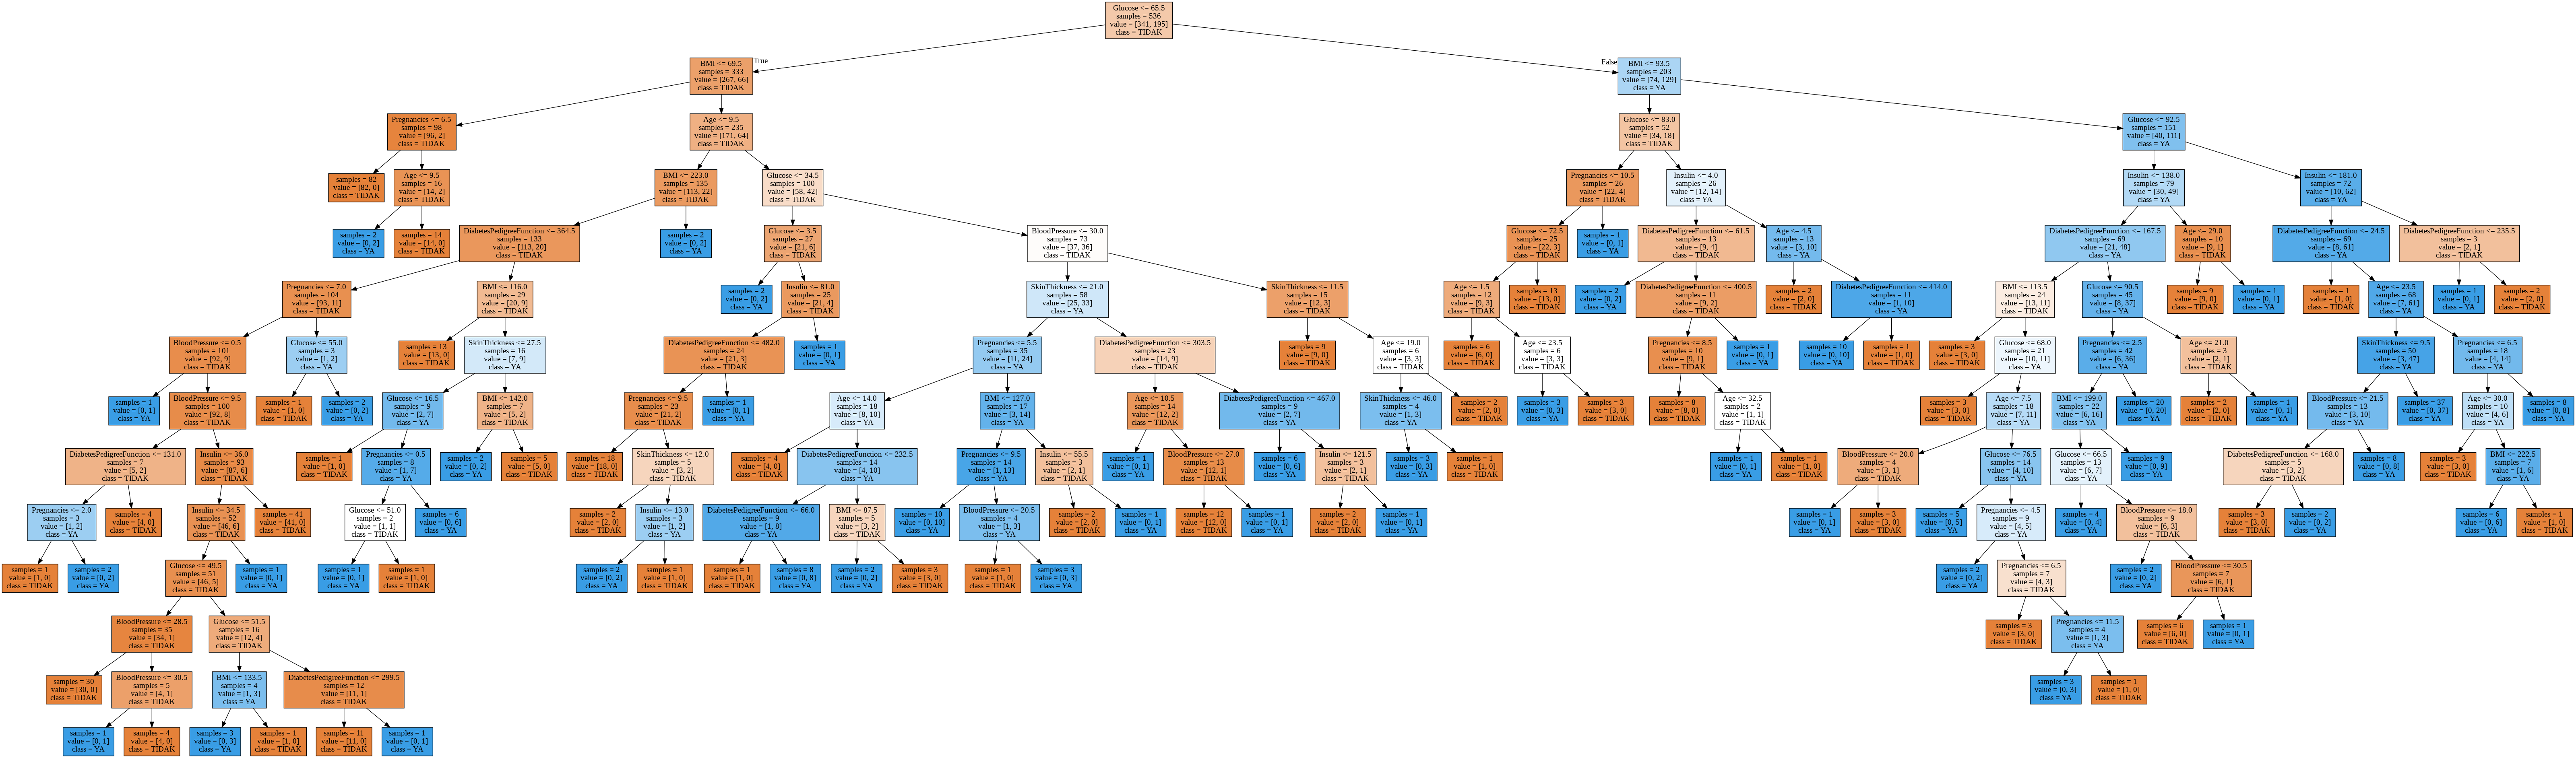

In [20]:
import graphviz
from sklearn.tree import export_graphviz
with open('image.dot') as fig:
  dot_graph = fig.read()

graph = pydotplus.graph_from_dot_data(dot_graph)
Image(graph.create_png())